# Neural Network Regression Model
predicting a number base on some other combination of variable.

In [1]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

print('tensorflow',tf.__version__)
print('numpy',np.__version__)
print('matplotlib',matplotlib.__version__)

tensorflow 2.8.0
numpy 1.22.3
matplotlib 3.4.3


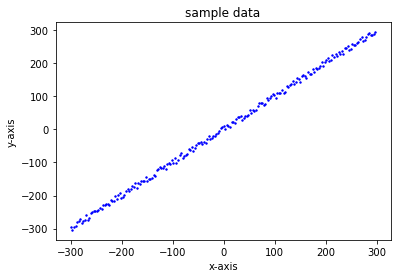

In [28]:
# create data and visualize
np.random.seed(42)
X = np.arange(-300,300,3)
y = X + 12.2 - (20 * np.random.rand(X.shape[0],))

plt.scatter(X,y,c='b',s=2)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('sample data');

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1),y,test_size=.2, random_state=42)
X_train.shape, y_train.shape

((160, 1), (160,))

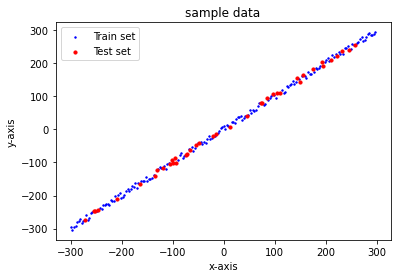

In [30]:
plt.scatter(X_train,y_train,c='b',s=2)
plt.scatter(X_test,y_test,c='r',s=10)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(['Train set','Test set'])
plt.title('sample data');

### Input and Output shape
in this case we want to use 1 X to predict 1 y :<br>
input_shape = (1,1) and output_shape = (1,)<br>
input shape must be vector (1,1) and (1,) mean scalar.

In [31]:
X[0], y[0]

(-300, -295.2908023769473)

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Create a model

In [33]:
tf.random.set_seed(42)

model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(1,input_shape=(1,)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100,),
    tf.keras.layers.Dense(100,'relu'),
    tf.keras.layers.Dense(32,'relu'),
    tf.keras.layers.Dense(1,)
])

model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=['mae'])

history = model.fit(X_train_norm,y_train, validation_data=(X_test_norm, y_test),epochs=250, verbose=0);

In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 1)                 2         
                                                                 
 dense_26 (Dense)            (None, 100)               200       
                                                                 
 dense_27 (Dense)            (None, 100)               10100     
                                                                 
 dense_28 (Dense)            (None, 100)               10100     
                                                                 
 dense_29 (Dense)            (None, 32)                3232      
                                                                 
 dense_30 (Dense)            (None, 1)                 33        
                                                                 
Total params: 23,667
Trainable params: 23,667
Non-trai

In [35]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

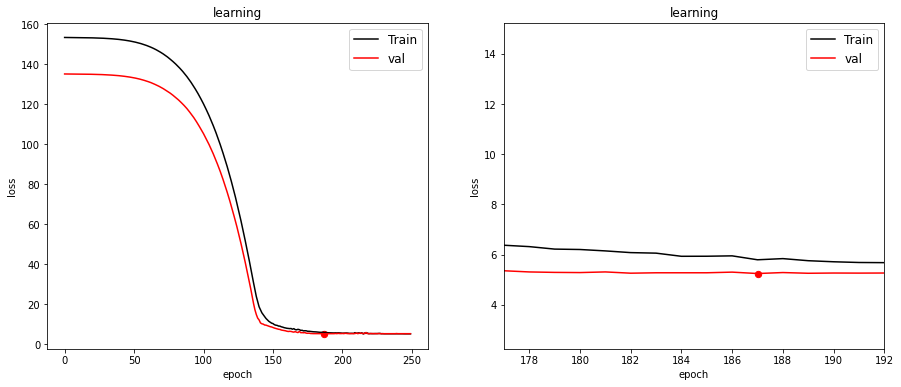

In [36]:
import pandas as pd

def plot_history(history, val_loss=False):
    learning = pd.DataFrame(history.history)
    fig, ax = plt.subplots(figsize=(15,6),ncols=2)
    ax[0].plot(np.arange(0,len(learning)), learning['loss'], c='k')
    ax[0].set(xlabel='epoch',ylabel='loss',title='learning')

    ax[1].plot(np.arange(0, len(learning)), learning['loss'], c='k')
    ax[1].set(xlabel='epoch',ylabel='loss',title='learning')

    if val_loss :
        ax[0].plot(np.arange(0,len(learning)), learning['val_loss'], c='r')
        ax[1].plot(np.arange(0,len(learning)), learning['val_loss'], c='r')

        #point
        ax[0].scatter(learning['val_loss'].argmin(),learning['val_loss'].min(), s=40, c='r') 
        ax[1].scatter(learning['val_loss'].argmin(),learning['val_loss'].min(), s=40, c='r')

        #axis
        ax[1].set_xlim([learning['val_loss'].argmin()-10, learning['val_loss'].argmin()+5])
        ax[1].set_ylim([learning['val_loss'].min()-3,learning['val_loss'].min()+10])

        ax[0].legend(['Train', 'val'], fontsize=12)
        ax[1].legend(['Train', 'val'], fontsize=12)


    else :
        #point 
        ax[0].scatter(learning['loss'].argmin(),learning['loss'].min(), s=40, c='k') 
        ax[1].scatter(learning['loss'].argmin(),learning['loss'].min(), s=40, c='k')

        #axis
        ax[1].set_xlim([learning['loss'].argmin()-10, learning['loss'].argmin()+5])
        ax[1].set_ylim([learning['loss'].min()-3,learning['loss'].min()+10])

    
plot_history(history,True)


> model learn not much after 200 epoch

In [37]:
error = model.evaluate(X_test_norm,y_test)
error

2/2 [==============================] - 0s 2ms/step - loss: 5.2530 - mae: 5.2530


[5.252992630004883, 5.252992630004883]

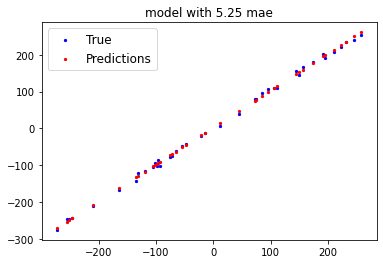

In [38]:
predictions = model.predict(X_test_norm)

plt.scatter(X_test,y_test,c='b',s=5)
plt.scatter(X_test,predictions,c='r',s=5)
plt.legend(['True','Predictions'],fontsize=12)
plt.title(f'model with {error[0]:.2f} mae')
plt.show();

## How to choose the right Learning Rate.
We’ll train the model for 100 epochs to test 100 different loss/learning rate combinations.

In [39]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([ 
    tf.keras.layers.Dense(1,input_shape=(1,)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100,),
    tf.keras.layers.Dense(100,'relu'),
    tf.keras.layers.Dense(32,'relu'),
    tf.keras.layers.Dense(1,)
])

model_2.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=['mae'])

lr_sch =  tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4* 10**(epoch/30)) # 1e-4 add 10**(epoch/20)
history = model_2.fit(X_train_norm,y_train, validation_data=(X_test_norm, y_test),epochs=100, verbose=0, callbacks=[lr_sch]);

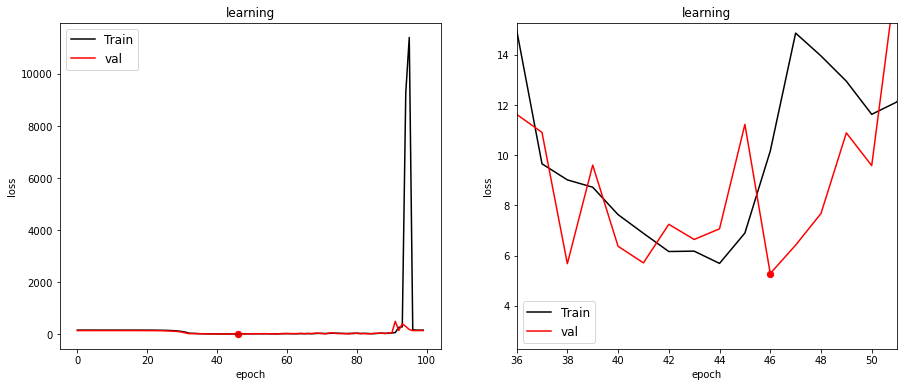

In [40]:
plot_history(history,True)

In [41]:
model_2.evaluate(X_test_norm, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 135.2288 - mae: 135.2288


[135.228759765625, 135.228759765625]

> this graph will not looking good because we change learning rate too much.

In [43]:
# Plot the learning rate versus the loss
def plot_learning_rate(history,a=10,b=20):
    '''
    lrs = initial_rate * (a** (epoch/b ) )
    '''
    learning = pd.DataFrame(history.history)['lr']
    lrs = learning[0] * (a ** (np.arange(len(learning)) / b))
    plt.figure(figsize=(10, 7))
    plt.semilogx(lrs, history.history["loss"],c='k') # we want the x-axis (learning rate) to be log scale
    plt.xlabel("Learning Rate")
    plt.ylabel("Loss")
    plt.title("Learning rate vs. loss")
    plt.axhline(min(history.history['loss']),linestyle = '--')

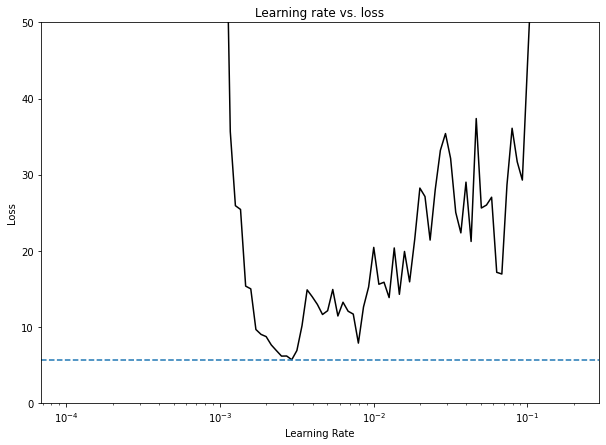

In [48]:
plot_learning_rate(history,b=30)
plt.ylim([0,50]);

> learning to minimum loss(first drop curve) about 2e-3 - 3e-3 

In [69]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([ 
    tf.keras.layers.Dense(1,input_shape=(1,)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100,),
    tf.keras.layers.Dense(100,'relu'),
    tf.keras.layers.Dense(32,'relu'),
    tf.keras.layers.Dense(1,)
])

model_3.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=29e-4),
                metrics=['mae'])

history = model_3.fit(X_train_norm,y_train, validation_data=(X_test_norm, y_test),epochs=250, verbose=0);

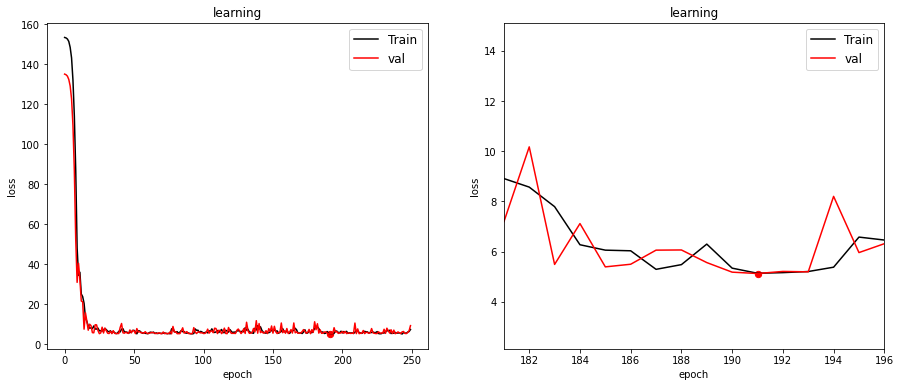

In [70]:
plot_history(history,True)

In [71]:
model_3.evaluate(X_test_norm, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 9.2388 - mae: 9.2388


[9.238805770874023, 9.238805770874023]

> that's work instead of train 100-150 improve a lot of loss curve, less than 50 epoch to improve loss curve

### Add more layers to Improve loss

In [117]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([ 
    tf.keras.layers.Dense(1,input_shape=(1,)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(64,'relu'),
    tf.keras.layers.Dense(45,),
    tf.keras.layers.Dense(32,'relu'),
    tf.keras.layers.Dense(1,)
])

model_4.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=29e-4),
                metrics=['mae'])

history = model_4.fit(X_train_norm,y_train, validation_data=(X_test_norm, y_test),epochs=100, verbose=0);

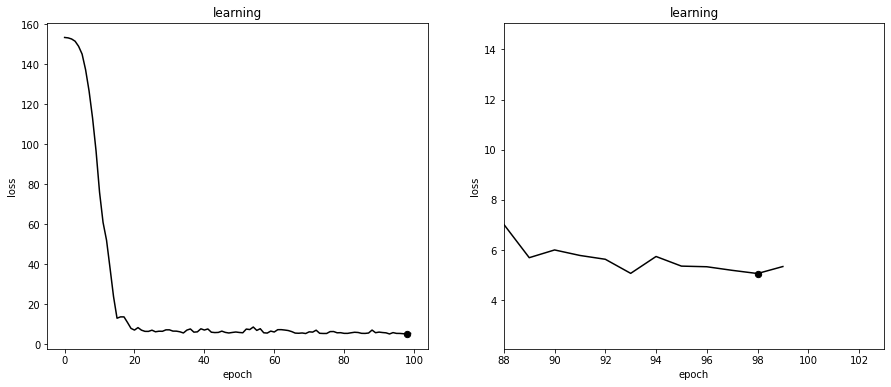

In [118]:
plot_history(history)

In [119]:
model_4.evaluate(X_test_norm,y_test)

2/2 [==============================] - 0s 4ms/step - loss: 5.2357 - mae: 5.2357


[5.235736846923828, 5.235736846923828]

## Save and load model

In [120]:
import joblib

model_4.save('model_4_regression.h5') # save model
joblib.dump(scaler,'model_scaler_regression.joblib') # save scaler

['model_scaler_regression.joblib']

In [121]:
model_loaded = tf.keras.models.load_model('model_4_regression.h5')
model_loaded.evaluate(X_test_norm, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 5.2357 - mae: 5.2357


[5.235736846923828, 5.235736846923828]

Make sure you use the same scale before make predictions.

In [122]:
model_loaded.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 45281.8828 - mae: 45281.8828


[45281.8828125, 45281.8828125]

In [123]:
scaler_loaded = joblib.load('model_scaler_regression.joblib')
X_test_scaler = scaler_loaded.transform(X_test)
model_loaded.evaluate(X_test_scaler, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 5.2357 - mae: 5.2357


[5.235736846923828, 5.235736846923828]

> that's 